In this notebook I will compare the VSH parameters obtained from different samples.

The reference catalog is set to be the Gaia-CRF2 subset.

In [1]:
from astropy.table import Table, join, Column
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

# 1 ICRF3 SX vs. Gaia-CRF2

In [2]:
vsh01x2gall = Table.read("../logs/icrf3_sx_gaia_vsh01_all.log", format="ascii")
vsh01x2gcln = Table.read("../logs/icrf3_sx_gaia_vsh01_cln.log", format="ascii")
vsh01x2gcom = Table.read("../logs/icrf3_sx_gaia_vsh01_com.log", format="ascii")
vsh01x2gccl = Table.read("../logs/icrf3_ka_sx_vsh01_ccl.log", format="ascii")

vsh02x2gall = Table.read("../logs/icrf3_sx_gaia_vsh02_all.log", format="ascii")
vsh02x2gcln = Table.read("../logs/icrf3_sx_gaia_vsh02_cln.log", format="ascii")
vsh02x2gcom = Table.read("../logs/icrf3_sx_gaia_vsh02_com.log", format="ascii")
vsh02x2gccl = Table.read("../logs/icrf3_sx_gaia_vsh02_ccl.log", format="ascii")

In [3]:
names = ["$D_1$", "$D_2$", "$D_3$", "$R_1$", "$R_2$", "$R_3$"]

labels = ["All-01", "All-02", "Clean-01", "Clean-02",
          "Com-01", "Com-02", "ComCln-01", "ComCln-02"]

estimates = np.array([vsh01x2gall["Estimate"],
                      vsh02x2gall["Estimate"][:6],
                      vsh01x2gcln["Estimate"],
                      vsh02x2gcln["Estimate"][:6],
                      vsh01x2gcom["Estimate"],
                      vsh02x2gcom["Estimate"][:6],
                      vsh01x2gccl["Estimate"],
                      vsh02x2gccl["Estimate"][:6]])

errors = np.array([vsh01x2gall["Error"],
                   vsh02x2gall["Error"][:6],
                   vsh01x2gcln["Error"],
                   vsh02x2gcln["Error"][:6],
                   vsh01x2gcom["Error"],
                   vsh02x2gcom["Error"][:6],
                   vsh01x2gccl["Error"],
                   vsh02x2gccl["Error"][:6]])

heights = 2 * errors
bottoms = estimates - errors

num = len(names)
width = 0.2
loc = np.arange(num) * 2
locs = [loc + width * (i+1) for i in range(len(labels))]

colors = ["r", "b", "y", "m"]

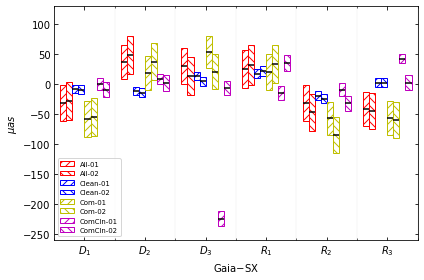

In [4]:
fig, ax = plt.subplots()

for i, colori in enumerate(colors):
    ax.bar(locs[2*i], heights[2*i], fill=False,
           bottom=bottoms[2*i], edgecolor=colori,
           width=width, align="edge", label=labels[2*i], hatch="///")
    ax.bar(locs[2*i+1], heights[2*i+1], fill=False,
           bottom=bottoms[2*i+1], edgecolor=colori,
           width=width, align="edge", label=labels[2*i+1], hatch="\\\\\\")
    ax.hlines(estimates[2*i], locs[2*i], locs[2*i]+width)
    ax.hlines(estimates[2*i+1], locs[2*i+1], locs[2*i+1]+width)

ax.legend(fontsize="x-small")

ax.set_xticks(loc+1)
ax.set_xticklabels(names)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.grid(True, which="Minor")

ax.set_xlim([0, 12])
ax.set_ylim([-259, 130])

ax.set_xlabel("Gaia$-$SX")
ax.set_ylabel("$\mu as$")

plt.tight_layout()

The model difference affect the determination of $D_3$ and $R_3$ for the common clean sample.

It is better to use VSH02 fit rather than VSH01.

The differences in solutions with and without removal of outliers are significant.

In [5]:
names = ["$E_{22}^R$", "$E_{22}^I$", "$E_{21}^R$", "$E_{21}^I$", "$E_{20}$",
         "$M_{22}^R$", "$M_{22}^I$", "$M_{21}^R$", "$M_{21}^I$", "$M_{20}$"]

labels = ["All-02", "Clean-02", "Com-02", "ComCln-02"]

estimates = np.array([vsh02x2gall["Estimate"][6:],
                      vsh02x2gcln["Estimate"][6:],
                      vsh02x2gcom["Estimate"][6:],
                      vsh02x2gccl["Estimate"][6:]])

errors = np.array([vsh02x2gall["Error"][6:],
                   vsh02x2gcln["Error"][6:],
                   vsh02x2gcom["Error"][6:],
                   vsh02x2gccl["Error"][6:]])

heights = 2 * errors
bottoms = estimates - errors

num = len(names)
width = 0.4
loc = np.arange(num) * 2
locs = [loc + width * (i+0.5) for i in range(len(labels))]

colors = ["r", "b", "y", "m"]

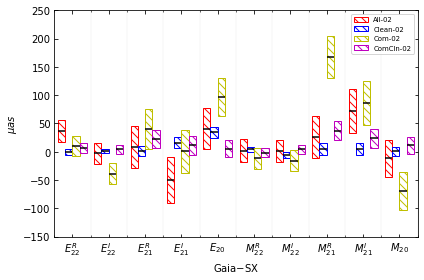

In [6]:
fig, ax = plt.subplots()

for i, colori in enumerate(colors):
    ax.bar(locs[i], heights[i], fill=False,
           bottom=bottoms[i], edgecolor=colori,
           width=width, align="edge", label=labels[i], hatch="\\\\\\")
    ax.hlines(estimates[i], locs[i], locs[i]+width)

ax.legend(fontsize="x-small")

ax.set_xticks(loc+1)
ax.set_xticklabels(names)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.grid(True, which="Minor")

ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")

ax.set_xlim([0, 20])
ax.set_ylim([-150, 250])

ax.set_xlabel("Gaia$-$SX")
ax.set_ylabel("$\mu as$")

plt.tight_layout()

While the fittings based on the ``All``, ``Clean``, and ``Clean common`` samples agree well, except for $M_{21}^R$, the fitting from ``Common`` sample stands alone.

As a result, this sample won't be used to derive the transformation parameters due to the limited sample size.

# 2. ICRF3 K vs. Gaia-CRF2

In [7]:
vsh01k2gall = Table.read("../logs/icrf3_k_gaia_vsh01_all.log", format="ascii")
vsh01k2gcln = Table.read("../logs/icrf3_k_gaia_vsh01_cln.log", format="ascii")
vsh01k2gcom = Table.read("../logs/icrf3_k_gaia_vsh01_com.log", format="ascii")
vsh01k2gccl = Table.read("../logs/icrf3_k_gaia_vsh01_ccl.log", format="ascii")

vsh02k2gall = Table.read("../logs/icrf3_k_gaia_vsh02_all.log", format="ascii")
vsh02k2gcln = Table.read("../logs/icrf3_k_gaia_vsh02_cln.log", format="ascii")
vsh02k2gcom = Table.read("../logs/icrf3_k_gaia_vsh02_com.log", format="ascii")
vsh02k2gccl = Table.read("../logs/icrf3_k_gaia_vsh02_ccl.log", format="ascii")

In [8]:
names = ["$D_1$", "$D_2$", "$D_3$", "$R_1$", "$R_2$", "$R_3$"]

labels = ["All-01", "All-02", "Clean-01", "Clean-02",
          "Com-01", "Com-02", "ComCln-01", "ComCln-02"]

estimates = np.array([vsh01k2gall["Estimate"],
                      vsh02k2gall["Estimate"][:6],
                      vsh01k2gcln["Estimate"],
                      vsh02k2gcln["Estimate"][:6],
                      vsh01k2gcom["Estimate"],
                      vsh02k2gcom["Estimate"][:6],
                      vsh01k2gccl["Estimate"],
                      vsh02k2gccl["Estimate"][:6]])

errors = np.array([vsh01k2gall["Error"],
                   vsh02k2gall["Error"][:6],
                   vsh01k2gcln["Error"],
                   vsh02k2gcln["Error"][:6],
                   vsh01k2gcom["Error"],
                   vsh02k2gcom["Error"][:6],
                   vsh01k2gccl["Error"],
                   vsh02k2gccl["Error"][:6]])

heights = 2 * errors
bottoms = estimates - errors

num = len(names)
width = 0.2
loc = np.arange(num) * 2
locs = [loc + width * (i+1) for i in range(len(labels))]

colors = ["r", "b", "y", "m"]

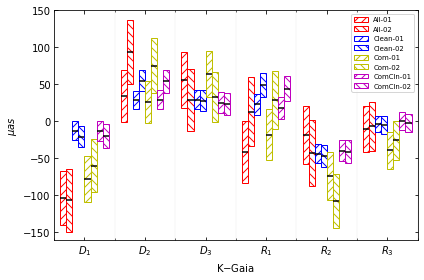

In [9]:
fig, ax = plt.subplots()

for i, colori in enumerate(colors):
    ax.bar(locs[2*i], heights[2*i], fill=False,
           bottom=bottoms[2*i], edgecolor=colori,
           width=width, align="edge", label=labels[2*i], hatch="///")
    ax.bar(locs[2*i+1], heights[2*i+1], fill=False,
           bottom=bottoms[2*i+1], edgecolor=colori,
           width=width, align="edge", label=labels[2*i+1], hatch="\\\\\\")
    ax.hlines(estimates[2*i], locs[2*i], locs[2*i]+width)
    ax.hlines(estimates[2*i+1], locs[2*i+1], locs[2*i+1]+width)
    
ax.legend(fontsize="x-small")

ax.set_xticks(loc+1)
ax.set_xticklabels(names)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.grid(True, which="Minor")

ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")

ax.set_xlim([0, 12])
ax.set_ylim([-160, 150])

ax.set_xlabel("K$-$Gaia")
ax.set_ylabel("$\mu as$")

plt.tight_layout()

The first degree of VSH terms generally agrees with each other for different models (VSH01 and VSH02).

The samples ``Clean`` and ``Clean common`` show almost the same result.

In [10]:
names = ["$E_{22}^R$", "$E_{22}^I$", "$E_{21}^R$", "$E_{21}^I$", "$E_{20}$",
         "$M_{22}^R$", "$M_{22}^I$", "$M_{21}^R$", "$M_{21}^I$", "$M_{20}$"]

labels = ["All-02", "Clean-02", "Com-02", "ComCln-02"]

estimates = np.array([vsh02k2gall["Estimate"][6:],
                      vsh02k2gcln["Estimate"][6:],
                      vsh02k2gcom["Estimate"][6:],
                      vsh02k2gccl["Estimate"][6:]])

errors = np.array([vsh02k2gall["Error"][6:],
                   vsh02k2gcln["Error"][6:],
                   vsh02k2gcom["Error"][6:],
                   vsh02k2gccl["Error"][6:]])

heights = 2 * errors
bottoms = estimates - errors

num = len(names)
width = 0.4
loc = np.arange(num) * 2
locs = [loc + width * (i+0.5) for i in range(len(labels))]

colors = ["r", "b", "y", "m"]

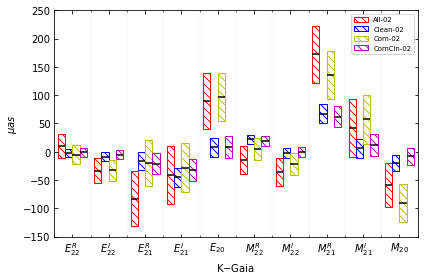

In [11]:
fig, ax = plt.subplots()

for i, colori in enumerate(colors):
    ax.bar(locs[i], heights[i], fill=False,
           bottom=bottoms[i], edgecolor=colori,
           width=width, align="edge", label=labels[i], hatch="\\\\\\")
    ax.hlines(estimates[i], locs[i], locs[i]+width)

ax.legend(fontsize="x-small")

ax.set_xticks(loc+1)
ax.set_xticklabels(names)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.grid(True, which="Minor")

ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")

ax.set_xlim([0, 20])
ax.set_ylim([-150, 250])

ax.set_xlabel("K$-$Gaia")
ax.set_ylabel("$\mu as$")

plt.tight_layout()

The parameters for $E_{20}$ and $M_{21}^R$ without outlier elimination differ significantly from those with outlier elimination.

In short, the clean samples of all sources and 488 common sources show similar large-scale differences wrt. the Gaia-CRF2.

# 5 ICRF3 X/Ka vs. Gaia

In [12]:
vsh01ka2gall = Table.read("../logs/icrf3_xka_gaia_vsh01_all.log", format="ascii")
vsh01ka2gcln = Table.read("../logs/icrf3_xka_gaia_vsh01_cln.log", format="ascii")
vsh01ka2gcom = Table.read("../logs/icrf3_xka_gaia_vsh01_com.log", format="ascii")
vsh01ka2gccl = Table.read("../logs/icrf3_xka_gaia_vsh01_ccl.log", format="ascii")

vsh02ka2gall = Table.read("../logs/icrf3_xka_gaia_vsh02_all.log", format="ascii")
vsh02ka2gcln = Table.read("../logs/icrf3_xka_gaia_vsh02_cln.log", format="ascii")
vsh02ka2gcom = Table.read("../logs/icrf3_xka_gaia_vsh02_com.log", format="ascii")
vsh02ka2gccl = Table.read("../logs/icrf3_xka_gaia_vsh02_ccl.log", format="ascii")

In [13]:
names = ["$D_1$", "$D_2$", "$D_3$", "$R_1$", "$R_2$", "$R_3$"]

labels = ["All-01", "All-02", "Clean-01", "Clean-02",
          "Com-01", "Com-02", "ComCln-01", "ComCln-02"]

estimates = np.array([vsh01ka2gall["Estimate"],
                      vsh02ka2gall["Estimate"][:6],
                      vsh01ka2gcln["Estimate"],
                      vsh02ka2gcln["Estimate"][:6],
                      vsh01ka2gcom["Estimate"],
                      vsh02ka2gcom["Estimate"][:6],
                      vsh01ka2gccl["Estimate"],
                      vsh02ka2gccl["Estimate"][:6]])

errors = np.array([vsh01ka2gall["Error"],
                   vsh02ka2gall["Error"][:6],
                   vsh01ka2gcln["Error"],
                   vsh02ka2gcln["Error"][:6],
                   vsh01ka2gcom["Error"],
                   vsh02ka2gcom["Error"][:6],
                   vsh01ka2gccl["Error"],
                   vsh02ka2gccl["Error"][:6]])

heights = 2 * errors
bottoms = estimates - errors

num = len(names)
width = 0.2
loc = np.arange(num) * 2
locs = [loc + width * (i+1) for i in range(len(labels))]

colors = ["r", "b", "y", "m"]

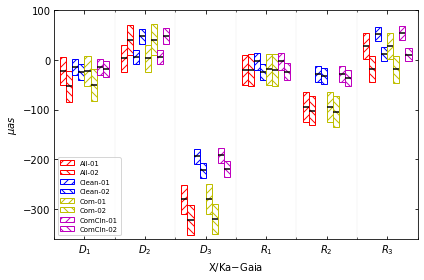

In [14]:
fig, ax = plt.subplots()

for i, colori in enumerate(colors):
    ax.bar(locs[2*i], heights[2*i], fill=False,
           bottom=bottoms[2*i], edgecolor=colori,
           width=width, align="edge", label=labels[2*i], hatch="///")
    ax.bar(locs[2*i+1], heights[2*i+1], fill=False,
           bottom=bottoms[2*i+1], edgecolor=colori,
           width=width, align="edge", label=labels[2*i+1], hatch="\\\\\\")
    ax.hlines(estimates[2*i], locs[2*i], locs[2*i]+width)
    ax.hlines(estimates[2*i+1], locs[2*i+1], locs[2*i+1]+width)

ax.legend(fontsize="x-small")

ax.set_xticks(loc+1)
ax.set_xticklabels(names)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.grid(True, which="Minor")

ax.set_xlim([0, 12])
ax.set_ylim([-360, 100])

ax.set_xlabel("X/Ka$-$Gaia")
ax.set_ylabel("$\mu as$")

plt.tight_layout()

The difference in the solutions with and without removal of outliers is significant in $D_3$ and $R_2$.

In [15]:
names = ["$E_{22}^R$", "$E_{22}^I$", "$E_{21}^R$", "$E_{21}^I$", "$E_{20}$",
         "$M_{22}^R$", "$M_{22}^I$", "$M_{21}^R$", "$M_{21}^I$", "$M_{20}$"]

labels = ["All-02", "Clean-02", "Com-02", "ComCln-02"]

estimates = np.array([vsh02ka2gall["Estimate"][6:],
                      vsh02ka2gcln["Estimate"][6:],
                      vsh02ka2gcom["Estimate"][6:],
                      vsh02ka2gccl["Estimate"][6:]])

errors = np.array([vsh02ka2gall["Error"][6:],
                   vsh02ka2gcln["Error"][6:],
                   vsh02ka2gcom["Error"][6:],
                   vsh02ka2gccl["Error"][6:]])

heights = 2 * errors
bottoms = estimates - errors

num = len(names)
width = 0.4
loc = np.arange(num) * 2
locs = [loc + width * (i+0.5) for i in range(len(labels))]

colors = ["r", "b", "y", "m"]

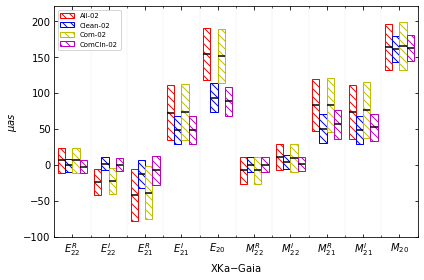

In [16]:
fig, ax = plt.subplots()

for i, colori in enumerate(colors):
    ax.bar(locs[i], heights[i], fill=False,
           bottom=bottoms[i], edgecolor=colori,
           width=width, align="edge", label=labels[i], hatch="\\\\\\")
    ax.hlines(estimates[i], locs[i], locs[i]+width)

ax.legend(fontsize="x-small")

ax.set_xticks(loc+1)
ax.set_xticklabels(names)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.grid(True, which="Minor")

ax.set_xlim([0, 20])
ax.set_ylim([-100, 220])

ax.set_xlabel("XKa$-$Gaia")
ax.set_ylabel("$\mu as$")

plt.tight_layout()

Simialr to $D_3$, The difference in the solutions with and without removal of outliers is significant in $E_{20}$.

In short, removal of outliers before least square fitting will make the terms like $D_3$ and $E_{20}$ less pronounced.